# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Foo101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to use only two classes (🍕 & 🥩) using the image modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out, what works (or better yet what doesn't work) before scaling up.

In [2]:
# Preprocessed dataset: https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
import os

# walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\steak'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [5]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
    # Created a list of class_names from the subdiretories
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # Show the shape of the image
    print(f"Image shape: {img.shape}") 

    return img

['218711.jpg']
Image shape: (512, 382, 3)


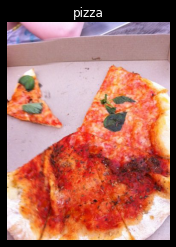

In [11]:
# View random image from the training dataset
img = view_random_image(
    target_dir="pizza_steak/train/", 
    target_class="pizza")

In [13]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[181, 119, 144],
        [176, 114, 139],
        [170, 106, 132],
        ...,
        [134, 114, 151],
        [137, 117, 154],
        [149, 129, 166]],

       [[179, 117, 142],
        [176, 112, 138],
        [170, 106, 132],
        ...,
        [140, 123, 159],
        [142, 125, 161],
        [151, 134, 170]],

       [[176, 112, 138],
        [173, 109, 135],
        [169, 105, 131],
        ...,
        [138, 120, 158],
        [142, 124, 162],
        [148, 130, 168]],

       ...,

       [[173, 135, 146],
        [171, 133, 144],
        [167, 129, 140],
        ...,
        [215, 194, 209],
        [217, 196, 211],
        [215, 194, 209]],

       [[174, 136, 147],
        [174, 134, 145],
        [171, 131, 142],
        ...,
        [215, 194, 209],
        [217, 196, 211],
        [215, 194, 209]],

       [[176, 136, 147],
        [175, 135, 146],
        [172, 132, 143],
        ...,
        [217, 196, 21

In [15]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 382, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (sind 255 is the maximum pixel value.)

In [16]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.70980392, 0.46666667, 0.56470588],
        [0.69019608, 0.44705882, 0.54509804],
        [0.66666667, 0.41568627, 0.51764706],
        ...,
        [0.5254902 , 0.44705882, 0.59215686],
        [0.5372549 , 0.45882353, 0.60392157],
        [0.58431373, 0.50588235, 0.65098039]],

       [[0.70196078, 0.45882353, 0.55686275],
        [0.69019608, 0.43921569, 0.54117647],
        [0.66666667, 0.41568627, 0.51764706],
        ...,
        [0.54901961, 0.48235294, 0.62352941],
        [0.55686275, 0.49019608, 0.63137255],
        [0.59215686, 0.5254902 , 0.66666667]],

       [[0.69019608, 0.43921569, 0.54117647],
        [0.67843137, 0.42745098, 0.52941176],
        [0.6627451 , 0.41176471, 0.51372549],
        ...,
        [0.54117647, 0.47058824, 0.61960784],
        [0.55686275, 0.48627451, 0.63529412],
        [0.58039216, 0.50980392, 0.65882353]],

       ...,

       [[0.67843137, 0.52941176, 0.57254902],
        [0.67058824, 0.52156863, 0.56470588],
        [0.65490196, 0

## AN end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # This layer actually is the same as the one above
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 392ms/step - loss: 0.5473 - accuracy: 0.7127 - val_loss: 0.3905 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4264 - accuracy: 0.8140 - val_loss: 0.3831 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3990 - accuracy: 0.8293 - val_loss: 0.3212 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.3799 - accuracy: 0.8327 - val_loss: 0.3151 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3112 - accuracy: 0.8773 - val_loss: 0.2838 - val_accuracy: 0.8920


🔑 **Note:** If the above cell is taking longer than ~10s per Epoch, make sure to use a GPU.

In [11]:
# Get a model summary 
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

🛠️ **Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/ 

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43089&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 1.4838 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 144ms/step - loss: 2.8409 - accuracy: 0.6567 - val_loss: 0.6137 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.7534 - accuracy: 0.7060 - val_loss: 1.0335 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 7s 154ms/step - loss: 0.6158 - accuracy: 0.7173 - val_loss: 0.4583 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4899 - accuracy: 0.7860 - val_loss: 0.4285 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5403 - accuracy: 0.7760 - val_loss: 1.3641 - val_accuracy: 0.6180


In [16]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles od model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out an learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.